### Building a neural network with TensorFlow
#### In this module we are going to build a neural network for regression. Regression is the prediction of a real-valued number given some inputs. 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Let's generate some data, in this case, a noisy sine wave as plotted below

In [2]:
n_observations = 1000
xs = np.linspace(-3.0, 3.0, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)

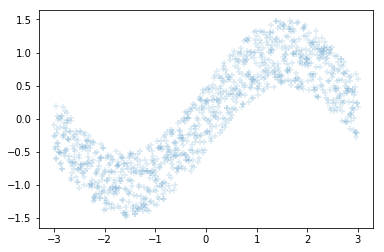

In [3]:
plt.scatter(xs, ys, alpha=0.15, marker = '+')
plt.show()
# alpha makes the points transparent and marker changes it from dots to +'s

#### We are going to use placeholders from now on. Placeholder for X and Y are as follows

In [4]:
X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

sess = tf.InteractiveSession()

In [5]:
n = tf.random_normal([1000]).eval()
n_ = tf.random_normal([1000], stddev = 0.1).eval()

(array([  24.,   41.,   96.,  147.,  202.,  193.,  140.,   94.,   48.,   15.]),
 array([-0.24799974, -0.19673291, -0.14546608, -0.09419925, -0.04293242,
         0.00833441,  0.05960124,  0.11086807,  0.16213489,  0.21340172,
         0.26466855]),
 <a list of 10 Patch objects>)

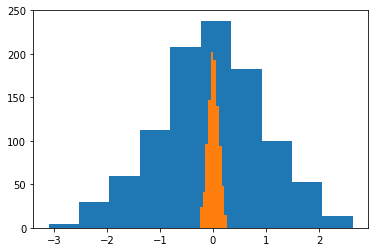

In [7]:
plt.hist(n) # plt.hist(n, 20) gives answer with 20 buckets
plt.hist(n_) # We need initial values much closer to 0 for initializing the weights

#### We need two parameters, weight W and bias B for our model

In [8]:
W = tf.Variable(tf.random_normal([1], stddev=0.1), name = 'weight')
B = tf.Variable(0.0, name = 'bias')

#### We need to define model, and a cost function

In [9]:
# Perceptron model (or Linear regression)
Y_ = X*W + B  

In [10]:
def distance(y, y_):
    return tf.abs(y-y_)

In [11]:
# cost = distance(Y_, tf.sin(X))

# Mean absolute error
cost = tf.reduce_mean(distance(Y_, Y))

In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

### Now we have defined the variables, we need to run the code
#### Before we run the code, we must also run the variables using tf.initialize_all_variables() to give an initial value to W and B.

In [19]:
n_iterations = 100
sess.run(tf.initialize_all_variables())
for _ in range(n_iterations):
    sess.run(optimizer, feed_dict = {X:xs, Y:ys})
    training_cost = sess.run(cost, feed_dict = {X:xs, Y:ys})
    
    # This is how to print the values mid execution
    print training_cost, sess.run(W), sess.run(B)

#### We'll now try doing the same thing with mini-batch learning

In [18]:
n_iterations = 100
sess.run(tf.initialize_all_variables())
for _ in range(n_iterations):
    ids = np.random.permutation([x for x in range(0, len(xs))])
    batch_size = 100
    i = 0
    while i < len(ids):
        sess.run(optimizer, feed_dict = {X:xs[i:i+batch_size], Y: ys[i:i+batch_size]})
        i += batch_size
        training_cost = sess.run(cost, feed_dict = {X:xs[i:i+batch_size], Y: ys[i:i+batch_size]})
        
        print training_cost, sess.run(W), sess.run(B)

### Higher dimensional approximation to Sine wave.
#### First let us a function for training our neural net

In [60]:
def train(X, Y, Y_, n_iterations = 100, batch_size = 100, learning_rate = 0.02):
    cost = tf.reduce_mean(distance(Y,Y_))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha= 0.1, marker='+')
    
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i*batch_size: (batch_i+1)*batch_size]
                sess.run(optimizer, feed_dict = {X:xs[idxs_i], Y:ys[idxs_i]})
                
            training_cost = sess.run(cost, feed_dict={X:xs, Y:ys})
            
            if it_i%10 == 0:
                ys_pred = Y_.eval(feed_dict = {X:xs}, session = sess)
                ax.plot(xs, ys_pred)
                print training_cost
        
    fig.show()
    plt.draw()

#### Let's model Y as a polynomial

In [61]:
Y_ = tf.Variable(tf.random_normal([1]), name = 'bias')

In [66]:
for pow_i in range(0, 4):
    W = tf.Variable(tf.random_normal([1], stddev = 0.1, name = 'weight_%d' % pow_i))
    Y_ = tf.add(tf.mul(tf.pow(X, pow_i), W), Y_)

0.574495
0.616855
0.505808
0.483377
0.562081
0.578755
0.753645
0.764939
0.311795
0.34376


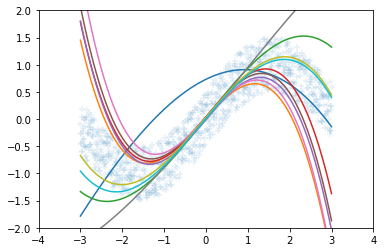

In [67]:
train(X, Y, Y_)

### Introducing non-linearities